# MNIST Database

Buraya kadar basit bir sinir ağının yapısını öğrendik, bir sonraki derste ilk defa gerçek bir problemle uğraşacağız. Bunun için şimdi bir sonraki derste ele alacağımız problemi ve kullanacağımız veri setini tanıtacağım.

Problemimiz şöyle; elimizde farklı insanların rakam el yazmalarından kesilmiş resimler var ve bunların hangi rakamın el yazması olduğunu biliyoruz. Her el yazması resmini input olarak alıp karşılık gelen outputlarla birlikte sinir ağımızı train edip sinir ağımızın verilen bir resmin hangi rakam olduğunu tespit edeceğiz.

Bu şekilde bir veri seti Python içinde vektörize edilmiş bir biçimde, yani resimlerin piksel değerleriyle sayısallaştırılmış hali, hazır bulunuyor. Bu kullanacağımız veri seti **MNIST** (Modified National Institue of Standarts) veri setidir. Bu veri setinde çok miktarda sihay-beyaz el yazması ve bunlara karşılık gelen label (output) değerleri mevcut; her bir resim $28\times 28$ piksel boyutunda standarttır.

Bu veri setine aşağıdaki gibi erişebiliriz; input resimleri `x_train`, bunlara karşılık gelen output değerlerini de `y_train` olarak adlandıracağız.

In [9]:
import tensorflow as tf
x_train, y_train = tf.keras.datasets.mnist.load_data()[0]
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Gördüğünüz gibi aldığımız veri setinde input olarak 60000 tane $28\times 28$ matris (yani 60000 resim) ve bunlara karşılık gelen 60000 tane sayı (skaler) var. Şimdi bunlardan bir tanesine (mesela 1000 indisli resime) bakalım.

In [15]:
print(x_train[1000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

Oldukça karmaşık ve anlamsız görünüyo olabilir, burada $28\times 28$ bir matris var ve her bir elemanı bir piksel değerini gösteriyor.

In [19]:
print(x_train[1000].shape)

(28, 28)


Burada 0 olan pikseller beyaznoktalar, diğer pikseller değerine göre koyu noktalar. Şimdi bu input değerinin hangi rakamın el yazması olduğuna bakalım.

In [16]:
print(y_train[1000])

0


Bu input `0` rakamının bir el yazmasının sayısallaştırılmış haliymiş. Gelin şimdi bu veriyi biraz daha okunaklı biçimde yazdıralım, her piksel değerini kendi yerinde yazdıralım ki bunun nasıl 0'a karşılık geldiğini canlandırabilelim.

In [17]:
for row in x_train[1000]:
    for i in row:
        print("%3s "%i, end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255 251  95   6   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232 254 254  35   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33 200 254 190   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   1   0   0  12 254 253  56   0   0 

Sanırım şimdi anlaşılmıştır, yukarıdaki $28\times 28$ matris aslında daha önce yazdırdığımızın aynısı; sadece daha düzgün bir formatta yazdırdık. Şimdi de bunun nasıl bir resme karşılık geldiğine bakalım, aşağıda bu piksel değerlerinin hangi resmi oluşturduğunu görebilirsiniz.

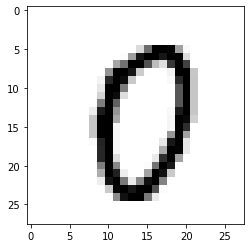

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap='gray_r')
plt.show()

Bu oluşturduğumuz dataset içinde buna benzer şekilde 60000 tane el yazması ve karşılık gelen rakam var, aşağıda bunlardan bazıları rastgele seçilip görüntüleniyor.

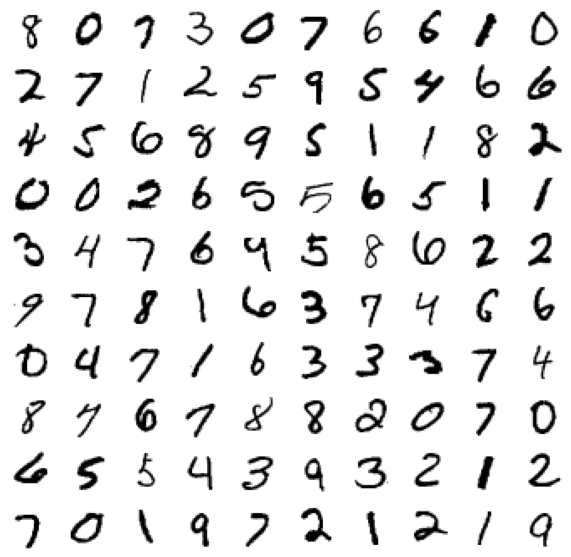

In [20]:
import numpy as np

n, k, figsize = 10, 10, (10, 10)
fig, ax = plt.subplots(n, k, figsize=figsize)
for i in range(n):
    for j in range(k):
        ax[i,j].imshow(x_train[np.random.randint(x_train.shape[0])], cmap='gray_r')
        ax[i,j].axis('off')

plt.show()

Biz bu reismleri input olarak kullanabilmek için boyutlarını değiştereceğiz, böylece her bir piksel değeri ayrı bir input olarak sinir ağımıza girilebilir. Bir $28\times 28$ matrisi $28\times 28 = 784$ elemanlı bir vektöre dönüştüreceğiz. Mesela yukarıda ele aldığımız resmi bu şekilde yeniden boyutlandıralım.

In [25]:
img1000 = x_train[1000].reshape(28*28,)

for px in img1000:
    print("%s "%px, end='')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 36 146 254 255 251 95 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 97 234 254 254 232 254 254 35 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 89 140 254 254 174 67 33 200 254 190 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 108 253 254 235 51 1 0 0 12 254 253 56 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 12 216 254 244 55 0 0 0 0 6 213 254 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 25 254 254 132 0 0 0 0 0 0 168 254 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 45 254 243 34 0 0 0 0 0 0 168 254 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 128 254 157 0 0 0 0 0 0 0 168 254 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0 19 228 254 105 0 0 0 0 0 0 7 228 254 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0 58 254 254 87 0 0 0 0 0 0 10 254 246 47 0 0 0 0 0 0 0 0 0 0 0 0 0 0 58 254 254 9 0 0 

Bu resmi artık aşağıdaki grafikte görüldüğü gibi sinir ağımıza input olarak verebiliriz.

![](img/deep_learning_20.jpg)

Veri setindeki tüm resimleri bu şekilde yeniden boyutlandıracağız (flatten) ve ondan sonra input olarak gireceğiz.